In [1]:
import matplotlib.pyplot as plt
import monte_carlo_option as mco
import numpy as np

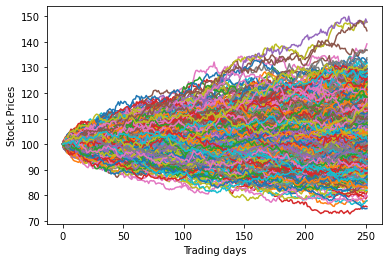

In [6]:
asset_prices = mco.monte_carlo.S_sim(S0=100, r=0.04, T=1, sigma=0.1, dlta=0.00, N=252, numiter=1000)
plt.figure()
plt.plot(range(252),asset_prices)
plt.xlabel("Trading days")
plt.ylabel("Stock Prices")
plt.show()

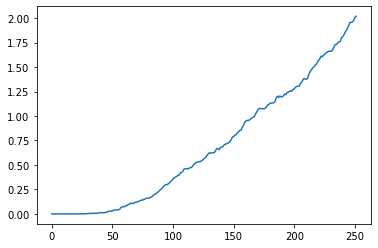

In [11]:
a = mco.monte_carlo.mc_call(asset_prices, r=0.04, T=1, N=252, numiter=1000, K=110)
plt.figure()
plt.plot(a)
plt.show()

## Trial and error parts
* Parameters
numiter =100
r = 0.04
dlta = 0.02
sigma = 0.1
S0 = 100
T = 1
N = 252
K = 105

* Code
S_mc = np.zeros((N,numiter))
call_mc = np.zeros((N,numiter))
C0expected = np.zeros(numiter)
for i in range(numiter):
    S_mc[:,i] = mco.monte_carlo.asset_price(S0, r, T, sigma, dlta, N)
    call_mc[:,i] = [mco.monte_carlo.call(S_mc[j,i],K) for j in range(N)]
C0expected = np.exp(-r*T)*(1/numiter)*np.sum(call_mc, axis=1)


#np.exp(-r*T)*(1/numiter)*
#print(mco.monte_carlo.call(S_mc[:,1],K))
#print(S_mc[:,1])